# SKIN CANCER DETECTOR

We made a Skin cancer detector using the Fast.ai library and ResNet CNN model. The classifier is designed to detect the type of Skin cancer in medical images, which will aid doctors in making informed treatment decisions. With this tool, we hope to contribute to improving healthcare outcomes

Made by:
Arjun Munjal 102103106,
Rohan Gulati 102103108,
Abhinandan Sharma 102103110,
Lakshit Bhansali 102103111

## Preprocessing

In this section we made different folders for different type of skin cancer and added a folder of normal skin manually

In [2]:
import os
import shutil
import pandas as pd

# Define the paths to the CSV file and the folder with the images
csv_path = "C:\\Users\\DELL\\Desktop\\Projecttt\\HAM10000_metadata.csv"
images_path = "C:\\Users\\DELL\\Desktop\\Projecttt\\pic"

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(csv_path)

# Create a dictionary mapping cancer types to lists of image IDs
cancer_types = {}
for index, row in data.iterrows():
    image_id = row["image_id"]
    cancer_type = row["dx"]
    if cancer_type in cancer_types:
        cancer_types[cancer_type].append(image_id)
    else:
        cancer_types[cancer_type] = [image_id]

# Create a directory for each cancer type and move the corresponding images into it
for cancer_type, image_ids in cancer_types.items():
    cancer_type_dir = os.path.join(images_path, cancer_type)
    os.makedirs(cancer_type_dir, exist_ok=True)
    for image_id in image_ids:
        image_path = os.path.join(images_path, image_id + ".jpg")
        if os.path.exists(image_path):
            shutil.move(image_path, os.path.join(cancer_type_dir, image_id + ".jpg"))


# Training the model using FastAI library Resnet50 Model

Importing fastbook library

In [80]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

As our data was already divided in different typre of skin cancer, we didn't have to preprocess it much and split it into train and test

In [81]:
cancer_types = 'ACTINIC KERATOSIS','BASAL CELL CARCINOMA','BENIGN KERATOSIS-LIKE LESIONS','DERMATOFIBROMA','MELANOMA','MELANOCYTIC NEVI','VASCULAR LESIONS','NORMAL'
path = Path('C:\\Users\\DELL\\Desktop\\Projecttt\\pic')

In [82]:
cancer = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(128)
)

dls = cancer.dataloaders(path)

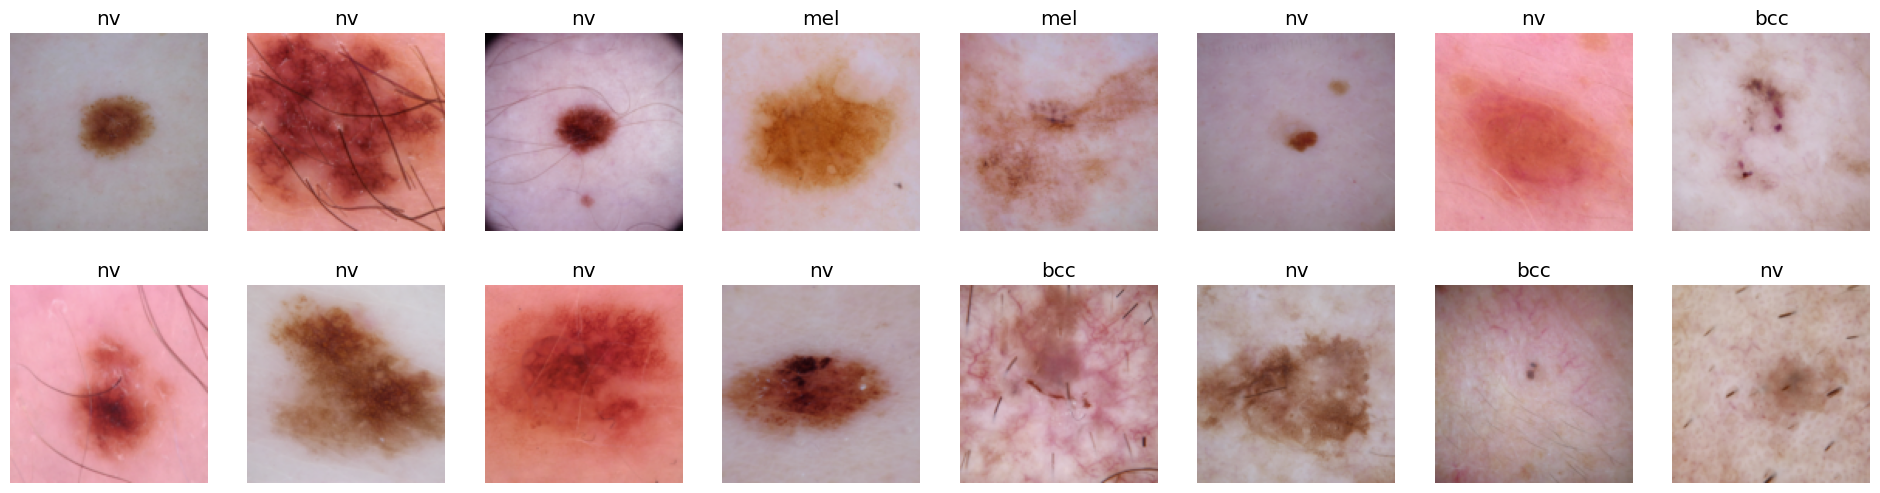

In [86]:
dls.valid.show_batch(max_n=16, nrows=2)


Now we're going to train our model using Resnet50 CNN model in FastAI library

In [88]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time
0,1.741803,1.094485,0.728586,24:16


epoch,train_loss,valid_loss,accuracy,time
0,0.898616,0.691457,0.778884,36:05
1,0.676069,0.601859,0.813745,35:13
2,0.515884,0.569709,0.821215,30:46
3,0.401648,0.623577,0.811753,29:59
4,0.325881,0.634421,0.819223,30:02
5,0.283704,0.591268,0.835159,30:02
6,0.232373,0.616663,0.835657,32:59
7,0.221521,0.692213,0.822211,30:36
8,0.170378,0.661615,0.839143,24:56
9,0.154071,0.592868,0.844123,24:16


Now our model is trained and we're print its Confusion matrix

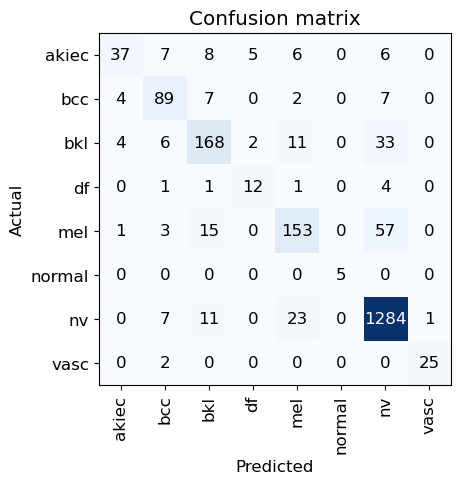

In [89]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Testing our model

In [90]:
learn.export()

In [91]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [92]:
learn_inf = load_learner(path/'export.pkl')

Now we will test it on random individual images specifying there path

In [5]:
a = learn_inf.predict("C:\\Users\\DELL\\Desktop\\Projecttt\\pic\\vasc\\ISIC_0027790.jpg")[0]

if a == 'akiec':
    print('ACTINIC KERATOSIS')
elif a == 'bcc':
    print('BASAL CELL CARCINOMA')
elif a == 'bkl':
    print('BENIGN KERATOSIS-LIKE LESIONS')
elif a == 'df':
    print('DERMATOFIBROMA')
elif a == 'mel':
    print('MELANOMA')
elif a == 'nv':
    print('MELANOCYTIC NEVI')
elif a == 'vasc':
    print('VASCULAR LESIONS')
elif a=='normal':
    print('Skin Cancer Not Detected')


BASAL CELL CARCINOMA


In [94]:
a=learn_inf.predict("C:\\Users\\DELL\\Desktop\\Projecttt\\pic\\bkl\\ISIC_0024592.jpg")[0]
if a == 'akiec':
    print('ACTINIC KERATOSIS')
elif a == 'bcc':
    print('BASAL CELL CARCINOMA')
elif a == 'bkl':
    print('BENIGN KERATOSIS-LIKE LESIONS')
elif a == 'df':
    print('DERMATOFIBROMA')
elif a == 'mel':
    print('MELANOMA')
elif a == 'nv':
    print('MELANOCYTIC NEVI')
elif a == 'vasc':
    print('VASCULAR LESIONS')

BENIGN KERATOSIS-LIKE LESIONS


Following code will take 10 random images from my testing folder and it will show actual value and predicted value

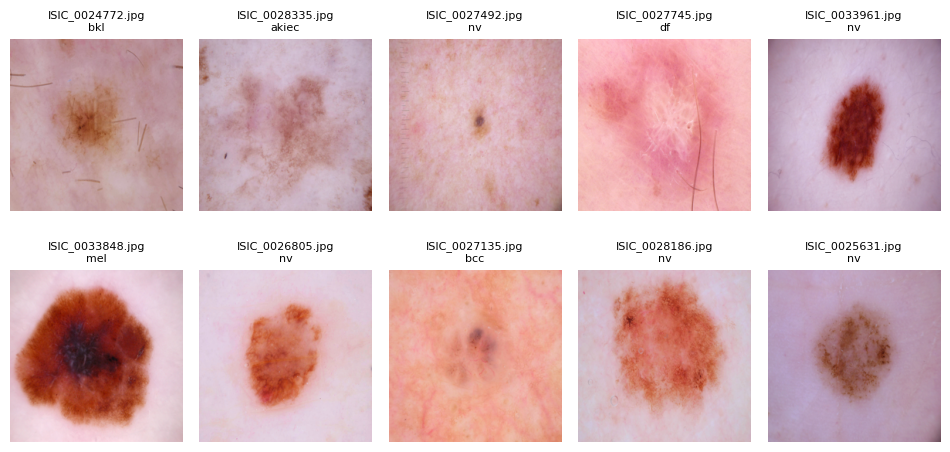

In [95]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Get the paths to 10 random test images
test_path = Path('C:\\Users\\DELL\\Desktop\\Projecttt\\pic')
test_images = get_image_files(test_path)
random_images = random.sample(test_images, 10)

# Load the exported learner
learn_inf = load_learner(path/'export.pkl')

# Create a 2x5 table to display the images and their predictions
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Loop through the 10 images and show the predicted labels
for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    predicted_label, _, _ = learn_inf.predict(img)
    
    # Display the image along with the predicted label
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    ax[row, col].set_title(f"{img_path.name}\n{predicted_label}", fontsize=8)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0)

plt.show()


# Now we're going to add interface for frontend

First i will install gradio using -pip install gradio

In [1]:
import gradio as gr
from fastai.vision.all import *

import PIL
from PIL import Image
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

I made predict_img function that will be passed to gradio interface

In [6]:
import io
learn_inf = load_learner(path/'export.pkl')
def predict_image (img):
    # Convert numpy array to PIL Image
    img = PIL.Image.fromarray(img)

    # Resize the uploaded image
    img = img.resize((224, 224))

    pred,_,_ = learn_inf.predict(img)
    
    # Return the predicted label
    return pred




# Define the Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.components.Image(),
    outputs=gr.components.Textbox(label="Predicted cancer"),
    title="SKIN CANCER DETECTOR",
    description="Upload an image of Skin to detect type of skin caner"
)

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
